In [36]:
data <- read.csv("final_cleaned_data.csv")

### STL

In [37]:
ts <- ts(data$MaxTemp, frequency = 365)

In [38]:
stl_result <- stl(ts, "periodic")

In [39]:
str(stl_result)

List of 8
 $ time.series: Time-Series [1:42340, 1:3] from 1 to 117: 3.56 4.44 4.19 3.83 4.15 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "seasonal" "trend" "remainder"
 $ weights    : num [1:42340] 1 1 1 1 1 1 1 1 1 1 ...
 $ call       : language stl(x = ts, s.window = "periodic")
 $ win        : Named num [1:3] 423401 549 365
  ..- attr(*, "names")= chr [1:3] "s" "t" "l"
 $ deg        : Named int [1:3] 0 1 1
  ..- attr(*, "names")= chr [1:3] "s" "t" "l"
 $ jump       : Named num [1:3] 42341 55 37
  ..- attr(*, "names")= chr [1:3] "s" "t" "l"
 $ inner      : int 2
 $ outer      : int 0
 - attr(*, "class")= chr "stl"


In [40]:
colnames(stl_result$time.series)

[1] "seasonal"  "trend"     "remainder"

In [41]:
head(stl_result$time.series)

seasonal,trend,remainder
3.564662,18.79227,0.9430653
4.442235,18.79916,-2.1413969
4.185326,18.80605,-1.1913764
3.826692,18.81294,-3.6396318
4.145644,18.81983,10.2345266
5.029252,18.82672,-1.1559701


In [42]:
stl_seasonal <- (stl_result$time.series)[, 1]
stl_trend <- (stl_result$time.series)[, 2]
stl_remainder <- (stl_result$time.series)[, 3]

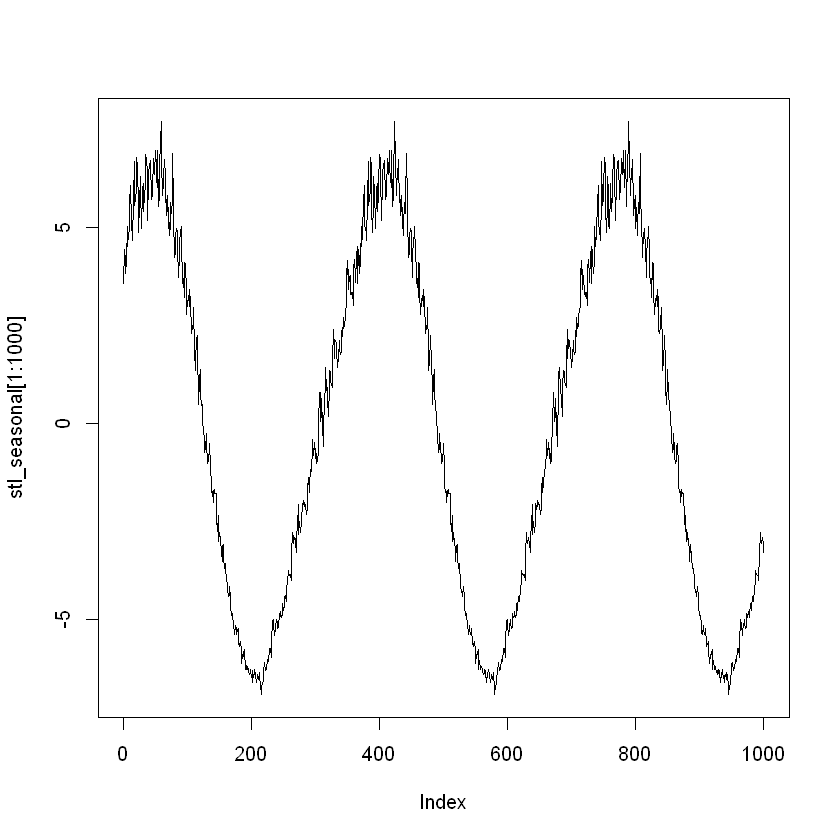

In [43]:
plot(stl_seasonal[1:1000], type = 'l')

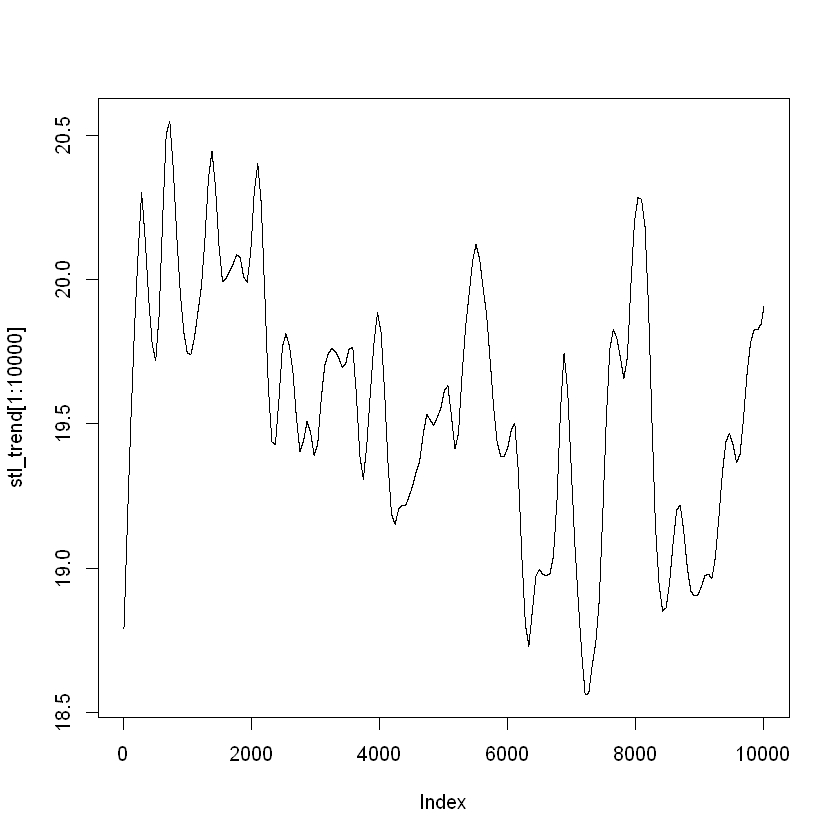

In [44]:
plot(stl_trend[1:10000], type = 'l')

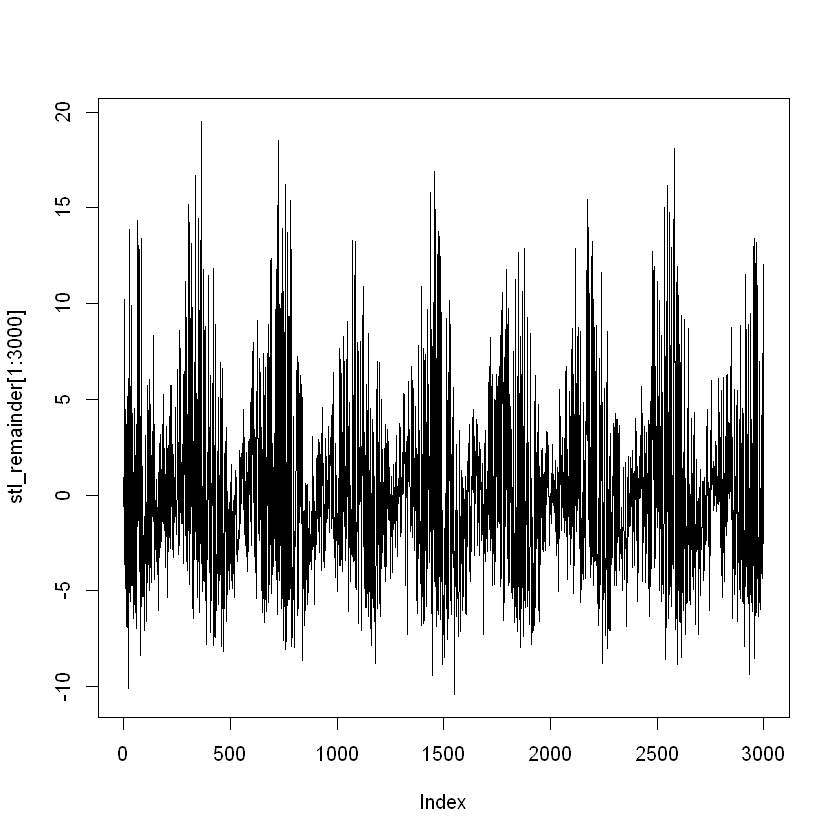

In [45]:
plot(stl_remainder[1:3000], type = 'l')

### Removing Trend in Frequency domain using (Periodogram and IFFT)

In [46]:
install.packages("TSA", repos = "http://cran.us.r-project.org") 
install.packages("seewave", repos = "http://cran.us.r-project.org")
install.packages("signal", repos = "http://cran.us.r-project.org")
install.packages("spectral", repos = "http://cran.us.r-project.org")
install.packages("fftw", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpyKZOz4\downloaded_packages


Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'seewave' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpyKZOz4\downloaded_packages


Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'signal' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'signal'"


The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpyKZOz4\downloaded_packages


Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'spectral' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpyKZOz4\downloaded_packages


Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'fftw' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpyKZOz4\downloaded_packages


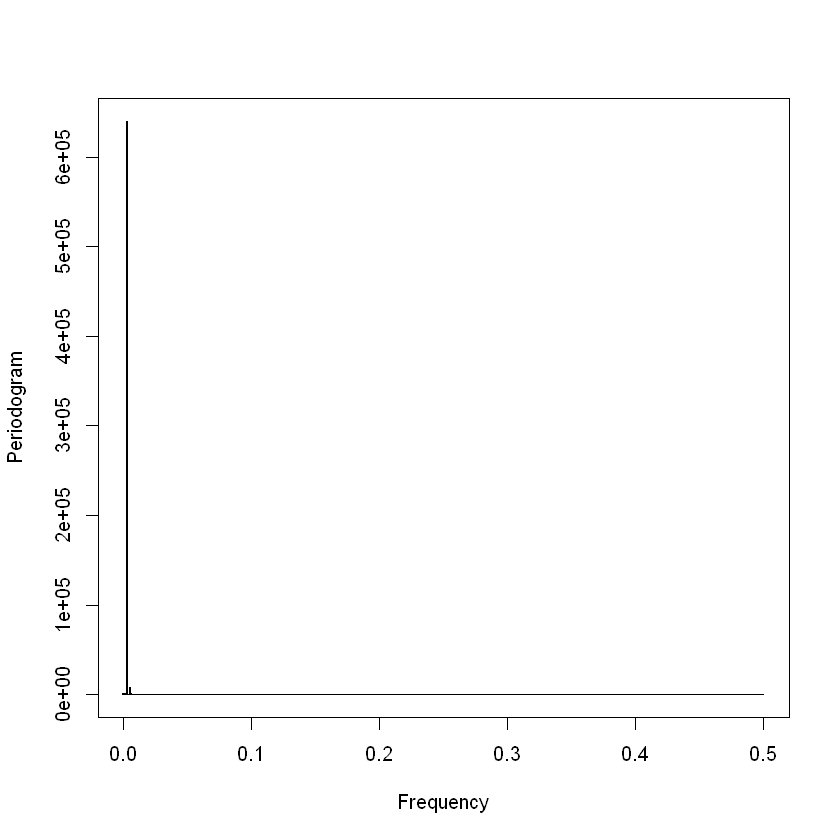

In [47]:
periodogram_result <- TSA::periodogram(data$MaxTemp, log = 'yes')

In [48]:
str(periodogram_result)

List of 16
 $ freq     : num [1:21600] 2.31e-05 4.63e-05 6.94e-05 9.26e-05 1.16e-04 ...
 $ spec     : num [1:21600] 1001.8 215.4 36.5 341.2 354.8 ...
 $ coh      : NULL
 $ phase    : NULL
 $ kernel   : NULL
 $ df       : num 1.96
 $ bandwidth: num 6.68e-06
 $ n.used   : int 43200
 $ orig.n   : int 42340
 $ series   : chr "x"
 $ snames   : NULL
 $ method   : chr "Raw Periodogram"
 $ taper    : num 0
 $ pad      : num 0
 $ detrend  : logi FALSE
 $ demean   : logi TRUE
 - attr(*, "class")= chr "spec"


In [49]:
length(periodogram_result$spec)
length(periodogram_result$freq)

[1] 21600

[1] 21600

In [50]:
which.max(periodogram_result$spec)

[1] 118

In [51]:
periodogram_result$freq[118]

[1] 0.002731481

In [52]:
1/0.00273148148148148

[1] 366.1017

This means there is a strong annual cycle in the data, which made sense!

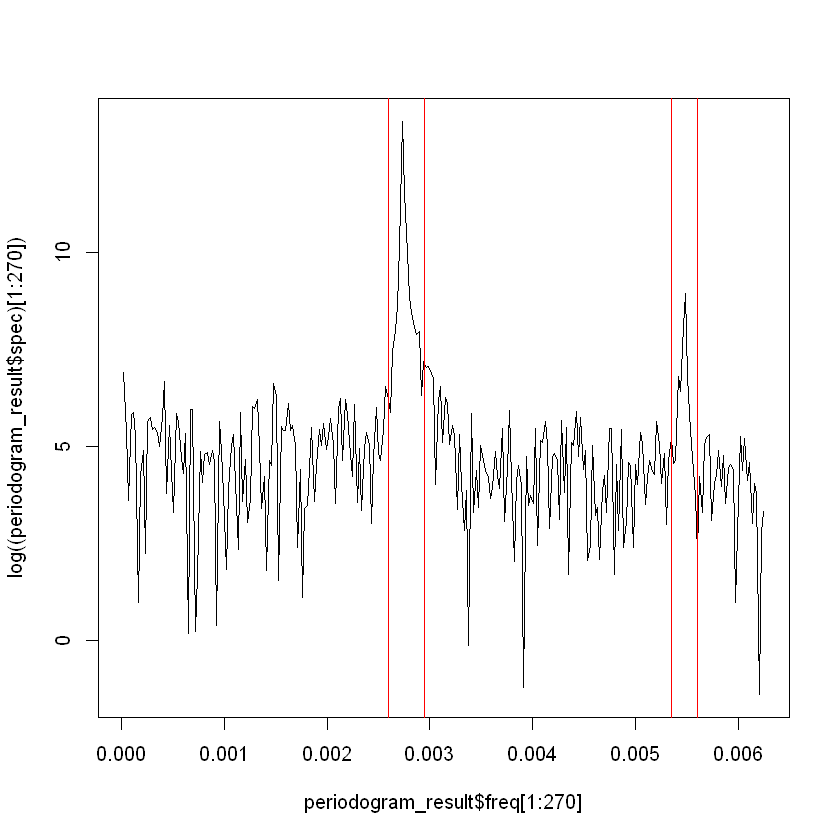

In [53]:
plot(periodogram_result$freq[1:270], log((periodogram_result$spec)[1:270]), type = 'l')
abline(v = 0.00260, col = 'red')
abline(v = 0.00295, col = 'red')
abline(v = 0.00535, col = 'red')
abline(v = 0.00560, col = 'red')

In [54]:
1/0.0055

[1] 181.8182

Strong cycles that appear twice a year.

In [55]:
sort(((periodogram_result$spec)[1:250]))

[1] 3.016003e-01 8.928277e-01 1.214549e+00 1.280221e+00 1.467526e+00
  [6] 2.685702e+00 3.058196e+00 4.655737e+00 5.362348e+00 5.545540e+00
 [11] 5.554521e+00 6.110173e+00 6.229660e+00 7.632742e+00 7.839104e+00
 [16] 8.060950e+00 9.496151e+00 9.758500e+00 1.039787e+01 1.092381e+01
 [21] 1.092880e+01 1.109572e+01 1.151382e+01 1.163539e+01 1.695686e+01
 [26] 1.720436e+01 1.798091e+01 1.988696e+01 2.067635e+01 2.094429e+01
 [31] 2.134043e+01 2.174980e+01 2.213690e+01 2.273346e+01 2.524495e+01
 [36] 2.679848e+01 2.692055e+01 2.720625e+01 2.721668e+01 2.845943e+01
 [41] 2.952042e+01 3.006638e+01 3.009574e+01 3.054203e+01 3.091919e+01
 [46] 3.223030e+01 3.234706e+01 3.337282e+01 3.389538e+01 3.458451e+01
 [51] 3.546237e+01 3.589910e+01 3.640288e+01 3.653030e+01 3.767746e+01
 [56] 3.907974e+01 4.101379e+01 4.226852e+01 4.393070e+01 4.460158e+01
 [61] 4.576756e+01 4.768434e+01 4.795703e+01 4.926865e+01 5.019137e+01
 [66] 5.093869e+01 5.452317e+01 5.531702e+01 5.559242e+01 5.627085e+01
 [71] 5.654950e+01 5.721595e+01 5.901609e+01 5.929829e+01 6.034546e+01
 [76] 6.255577e+01 6.605329e+01 6.613492e+01 6.860186e+01 6.870176e+01
 [81] 6.926325e+01 6.968520e+01 6.998482e+01 7.041569e+01 7.109355e+01
 [86] 7.199072e+01 7.439857e+01 7.708257e+01 7.766377e+01 8.032171e+01
 [91] 8.056654e+01 8.118145e+01 8.186199e+01 8.411025e+01 8.494200e+01
 [96] 9.133316e+01 9.148866e+01 9.178259e+01 9.190004e+01 9.293118e+01
[101] 9.324695e+01 9.426324e+01 9.575502e+01 9.906975e+01 1.018349e+02
[106] 1.022642e+02 1.024773e+02 1.027149e+02 1.031993e+02 1.034709e+02
[111] 1.038850e+02 1.046482e+02 1.065480e+02 1.068459e+02 1.102596e+02
[116] 1.114296e+02 1.114510e+02 1.121081e+02 1.153863e+02 1.156538e+02
[121] 1.193298e+02 1.199313e+02 1.225315e+02 1.235299e+02 1.241736e+02
[126] 1.253995e+02 1.300331e+02 1.309130e+02 1.315213e+02 1.332163e+02
[131] 1.337477e+02 1.340145e+02 1.383961e+02 1.406894e+02 1.414562e+02
[136] 1.461426e+02 1.482525e+02 1.506054e+02 1.515655e+02 1.519905e+02
[141] 1.528770e+02 1.533094e+02 1.533912e+02 1.545671e+02 1.554617e+02
[146] 1.555361e+02 1.567752e+02 1.570418e+02 1.573937e+02 1.600864e+02
[151] 1.635334e+02 1.644756e+02 1.649827e+02 1.733723e+02 1.808830e+02
[156] 1.879075e+02 1.908869e+02 1.980474e+02 1.985411e+02 2.003514e+02
[161] 2.021300e+02 2.031874e+02 2.091443e+02 2.134588e+02 2.138246e+02
[166] 2.147519e+02 2.154368e+02 2.210329e+02 2.214006e+02 2.217334e+02
[171] 2.224552e+02 2.237160e+02 2.308020e+02 2.308737e+02 2.314171e+02
[176] 2.325539e+02 2.325623e+02 2.335945e+02 2.368888e+02 2.423440e+02
[181] 2.427174e+02 2.440676e+02 2.496081e+02 2.513609e+02 2.515027e+02
[186] 2.558092e+02 2.708667e+02 2.814758e+02 2.828404e+02 2.832457e+02
[191] 2.842464e+02 2.852589e+02 2.897332e+02 3.066208e+02 3.091794e+02
[196] 3.118999e+02 3.159481e+02 3.368136e+02 3.411908e+02 3.503578e+02
[201] 3.504022e+02 3.533771e+02 3.545055e+02 3.547993e+02 3.626991e+02
[206] 3.782210e+02 3.883537e+02 3.885465e+02 3.949144e+02 3.979328e+02
[211] 4.018819e+02 4.170041e+02 4.358097e+02 4.433302e+02 4.470200e+02
[216] 4.787769e+02 4.909228e+02 4.965647e+02 4.966171e+02 5.036136e+02
[221] 5.288263e+02 5.317635e+02 5.542664e+02 6.139851e+02 6.976612e+02
[226] 7.002395e+02 7.461862e+02 7.831192e+02 8.503052e+02 8.893026e+02
[231] 9.060838e+02 1.001807e+03 1.057759e+03 1.143501e+03 1.158796e+03
[236] 1.314455e+03 1.714040e+03 2.621683e+03 2.837274e+03 2.972442e+03
[241] 3.187271e+03 3.247053e+03 4.695975e+03 5.438176e+03 6.969603e+03
[246] 7.636780e+03 2.185703e+04 2.534856e+04 1.024741e+05 6.399295e+05

In [56]:
which.max(periodogram_result$spec[130:270])

[1] 108

In [57]:
130+108-1
# position of second peak

[1] 237

Now we need to remove amplitudes contributed by 2 'peaks':
1. yearly frequency
2. biyearly 

In [58]:
first_peak_indices <- which(periodogram_result$freq >= 0.00260 & periodogram_result$freq <= 0.00295)
first_peak_indices

[1] 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127

In [59]:
second_peak_indices <- which(periodogram_result$freq >= 0.00535 & periodogram_result$freq <= 0.00560)
second_peak_indices

[1] 232 233 234 235 236 237 238 239 240 241

In [60]:
periodogram_result$spec[first_peak_indices] = 0
periodogram_result$spec[second_peak_indices] = 0

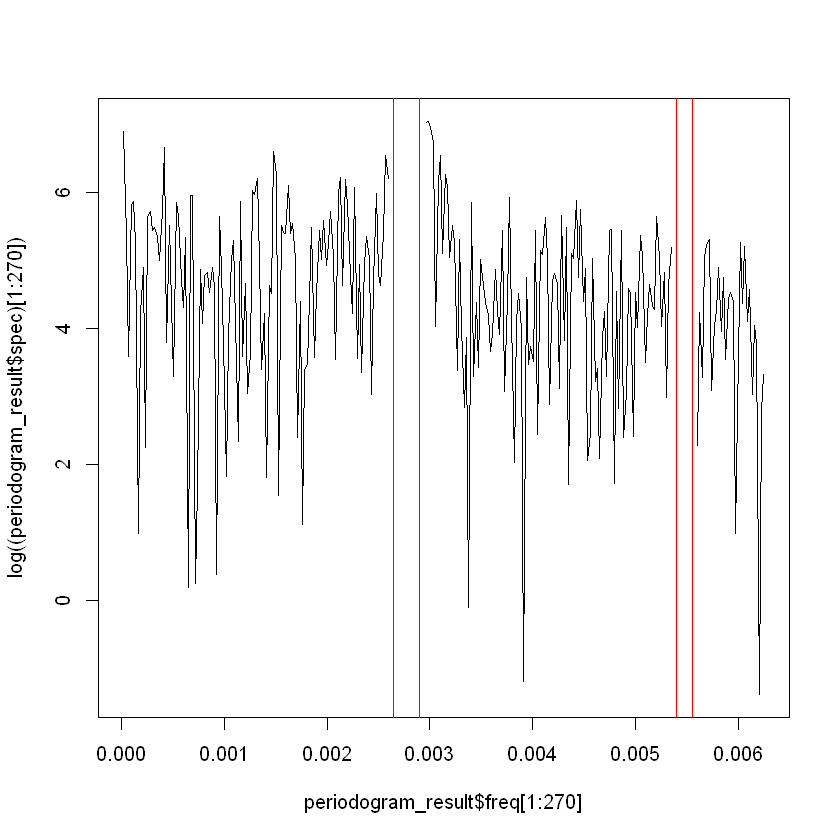

In [61]:
plot(periodogram_result$freq[1:270], log((periodogram_result$spec)[1:270]), type = 'l')
abline(v = 0.00265, col = 'red')
abline(v = 0.00290, col = 'red')
abline(v = 0.00540, col = 'red')
abline(v = 0.00555, col = 'red')

In [62]:
raw_temp <- data$MaxTemp

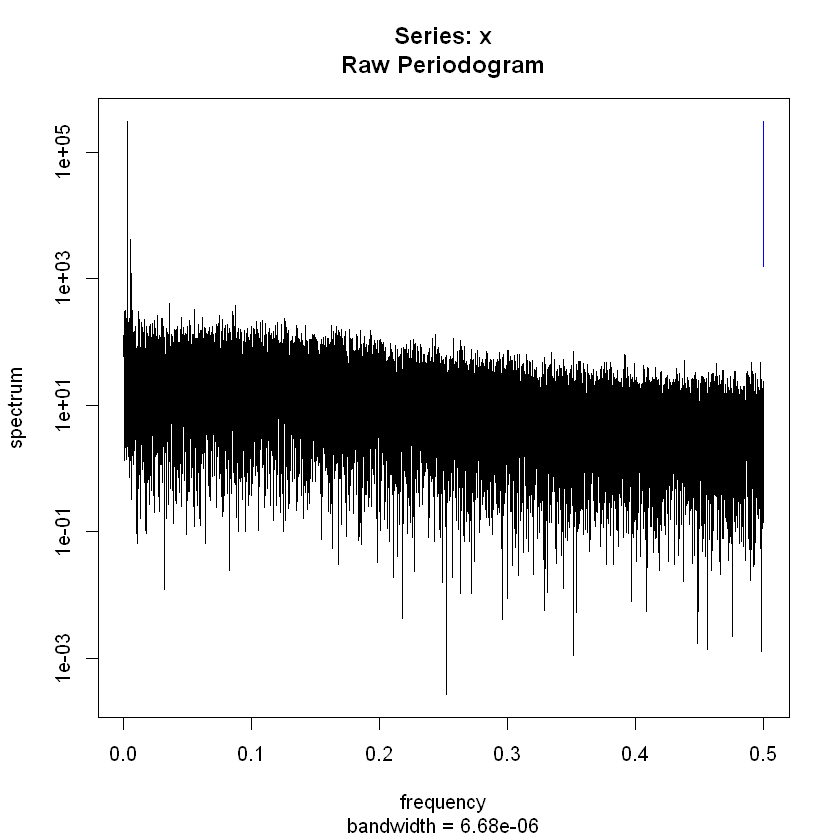

In [69]:
spectral_density <- spectrum(raw_temp)

In [104]:
annual_osc = spectral::filter.fft(raw_temp, x = NULL, fc = 0.002725, BW = 0.00105, n = 2)
biannual_osc = spectral::filter.fft(raw_temp, x = NULL, fc = 0.00545, BW = 0.0002, n = 2)

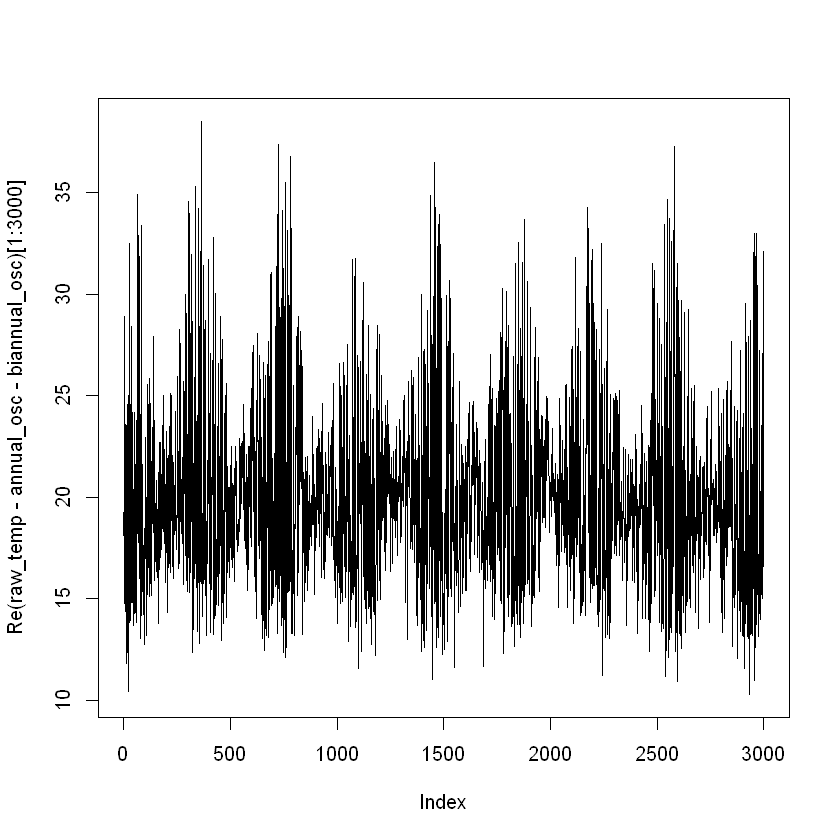

In [111]:
plot(Re(raw_temp - annual_osc - biannual_osc)[1:3000], type = 'l')

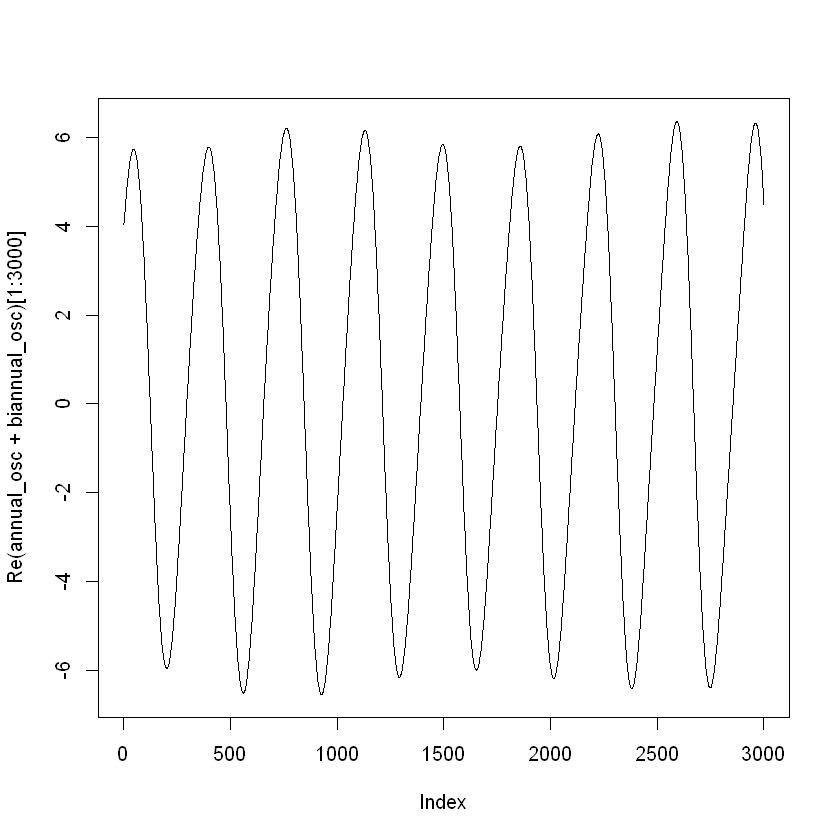

In [106]:
plot(Re(annual_osc + biannual_osc)[1:3000], type = 'l')

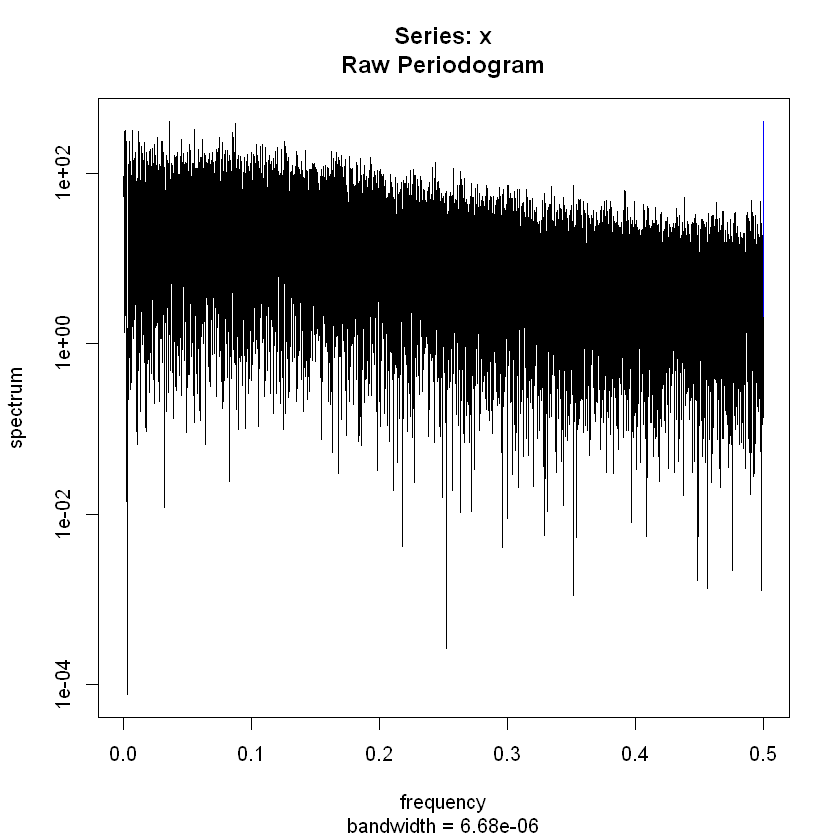

In [107]:
spectrum(Re(raw_temp - annual_osc - biannual_osc))

In [108]:
filtered = Re(raw_temp - annual_osc - biannual_osc)

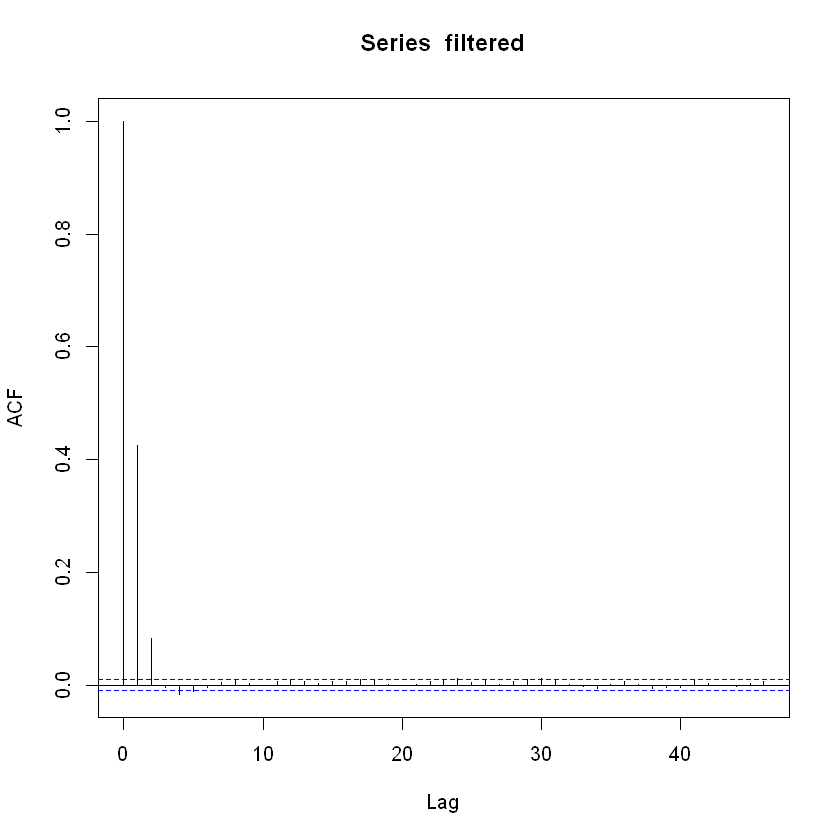

In [109]:
acf(filtered)

### Removing Trend in the Time Domain

In [ ]:
raw_temp <- data$MaxTemp

In [ ]:
t <- c(1:42340)
omega <- 2*pi*0.00273148148148148
res <- nls(raw_temp ~ A*sin(omega*t+phi)+C, data = data.frame(t, raw_temp), start=list(A=1,phi=1, C=1))

In [ ]:
summary(res)

In [ ]:
trend <- ((-5.500347*sin(omega*t-1.8)+19.684548))
plot(trend[1:1000], col = 'black', ylim=c(-10, 35))
lines(t[1:1000], raw_temp[1:1000], col = 'red')
lines(t[1:1000], (trend - raw_temp)[1:1000])

In [ ]:
mean(raw_temp)

In [ ]:
2*pi